# Model visualization

In [ ]:
import torch

In [ ]:
import torch.nn as nn

num_features = 50
num_output = 3

# Define the model
model = nn.Sequential(
    nn.Linear(num_features, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, num_output),
)

### Manual

In [5]:
def count_parameters(model):
    """Prints the number of total, trainable parameters, and parameters per layer for a PyTorch model."""
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}\n")
    print("Parameters by layer:")
    for name, param in model.named_parameters():
        print(f"  {name}: {param.numel():,}")


count_parameters(model)

Total parameters: 1,623
Trainable parameters: 1,623

Parameters by layer:
  0.weight: 1,200
  0.bias: 24
  2.weight: 288
  2.bias: 12
  4.weight: 72
  4.bias: 6
  6.weight: 18
  6.bias: 3


### Torchsummary

In [ ]:
from torchsummary import summary

input_size = (num_features,)
summary(model, input_size=input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 24]           1,224
              ReLU-2                   [-1, 24]               0
            Linear-3                   [-1, 12]             300
              ReLU-4                   [-1, 12]               0
            Linear-5                    [-1, 6]              78
              ReLU-6                    [-1, 6]               0
            Linear-7                    [-1, 3]              21
Total params: 1,623
Trainable params: 1,623
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


### Torchviz

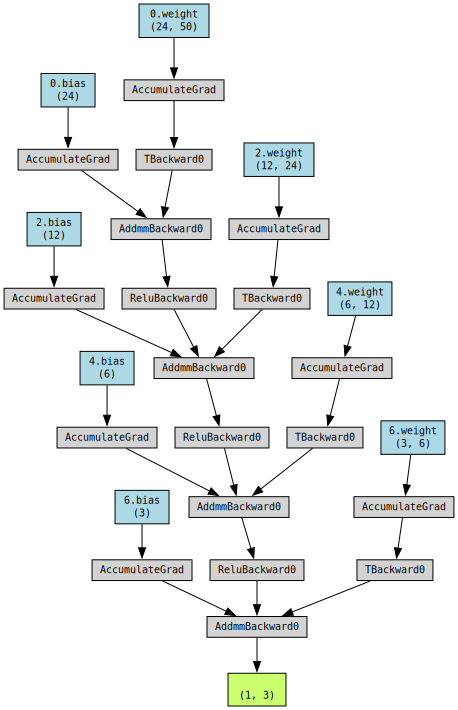

In [ ]:
from torchviz import make_dot

X_sample = torch.rand(1, num_features) # (batch_size, num_features)
Y_sample = model(X_sample)
make_dot(Y_sample, params=dict(model.named_parameters()))

### Tensorboard

- Type in your command prompt
    - `tensorboard --logdir=src/T01_basic_pytorch/runs`
- Visit http://localhost:6006

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter("runs/model_visualization")
writer.add_graph(model, X_sample)
writer.close()

### App

- Visit https://netron.app/
- Load the saved model.

In [ ]:
torch.save(model, "./my_pytorch_model.pt")